In [41]:
import pandas as pd
import seaborn as sns

### 수집한 csv 파일을 불러옴

In [8]:
kospi = pd.read_csv("./CSV/kospi.csv")
corona = pd.read_csv("./CSV/corona_coin.csv")

In [9]:
kospi.shape, corona.shape

((400, 2), (422, 3))

### kospi와 corona 데이터 정보확인

In [10]:
kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    400 non-null    object 
 1   Close   400 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.4+ KB


In [11]:
kospi.head()

,Date,Close
0,2020-01-20,2262.639893
1,2020-01-21,2239.689941
2,2020-01-22,2267.250000
3,2020-01-23,2246.129883
4,2020-01-28,2176.719971


In [12]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  422 non-null    int64 
 1   일자          422 non-null    object
 2   계(명)        422 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.0+ KB


In [13]:
corona.head(10)

,Unnamed: 0,일자,계(명)
0,0,2020-01-20,1
1,1,2020-01-21,0
2,2,2020-01-22,0
3,3,2020-01-23,0
4,4,2020-01-24,1
5,5,2020-01-27,1
6,6,2020-01-28,0
7,7,2020-01-29,0
8,8,2020-01-30,3
9,9,2020-01-31,4


### kospi와 corona 데이터 병합

In [35]:
dat_all = kospi.merge(corona, left_on='Date', right_on='일자')
dat_all.head(3)

,Date,Close,Unnamed: 0,일자,계(명)
0,2020-01-20,2262.639893,0,2020-01-20,1
1,2020-01-21,2239.689941,1,2020-01-21,0
2,2020-01-22,2267.250000,2,2020-01-22,0


In [36]:
dat_all = dat_all[['Date','Close','계(명)']]
dat_all.head()

,Date,Close,계(명)
0,2020-01-20,2262.639893,1
1,2020-01-21,2239.689941,0
2,2020-01-22,2267.250000,0
3,2020-01-23,2246.129883,0
4,2020-01-28,2176.719971,0


### column명 변경

In [37]:
dat_all.columns = ['Date', 'kospi_종가', '일일확진자']

In [38]:
dat_all.head()

,Date,kospi_종가,일일확진자
0,2020-01-20,2262.639893,1
1,2020-01-21,2239.689941,0
2,2020-01-22,2267.250000,0
3,2020-01-23,2246.129883,0
4,2020-01-28,2176.719971,0


### 중복되는 column 삭제

In [22]:
dat_all.drop(['Date','Close','계(명)'], axis=1, inplace=True)

In [23]:
dat_all

,kospi_종가,일일확진자
0,2262.639893,1
1,2239.689941,0
2,2267.250000,0
3,2246.129883,0
4,2176.719971,0
...,...,...
395,3090.209961,1417
396,3138.300049,1507
397,3146.810059,2154
398,3128.530029,1882


### kospi_종가와 일일확진자 간의 상관관계 

In [39]:
dat_all[['kospi_종가','일일확진자']].corr()

,kospi_종가,일일확진자
kospi_종가,1.000000,0.698671
일일확진자,0.698671,1.000000


In [40]:
dat_all.head(3)

,Date,kospi_종가,일일확진자
0,2020-01-20,2262.639893,1
1,2020-01-21,2239.689941,0
2,2020-01-22,2267.250000,0


/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51652 missing from current font.
  

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51652 missing from current font.
  font.set

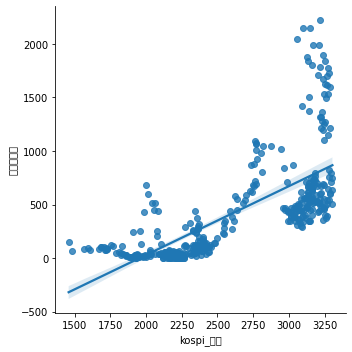

In [42]:
sns.lmplot(x = "kospi_종가", y = "일일확진자", data = dat_all)

In [43]:
dat_all[['kospi_종가','일일확진자']].corr()

,kospi_종가,일일확진자
kospi_종가,1.000000,0.698671
일일확진자,0.698671,1.000000


In [44]:
dat_all.head(3)

,Date,kospi_종가,일일확진자
0,2020-01-20,2262.639893,1
1,2020-01-21,2239.689941,0
2,2020-01-22,2267.250000,0


In [45]:
dat_all.to_csv("./CSV/corona_kospi.csv", index = False)